<a href="https://colab.research.google.com/github/Ganeshpy3/projects/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import  Dense, Flatten,Conv2D,MaxPooling2D,Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy

In [4]:
import cv2

In [6]:
os.listdir("/content/drive/MyDrive/Data/Good Morning")[:5]

['IMG-20210327-WA0003.jpg',
 'IMG-20210329-WA0008.jpg',
 'IMG-20210509-WA0006.jpg',
 'IMG-20210614-WA0002.jpg',
 'IMG-20210615-WA0001.jpg']

In [15]:
X=[]
Y=[]

In [16]:
Normal_pics_path="/content/drive/MyDrive/Data/Normal pics/"
good_morning_path="/content/drive/MyDrive/Data/Good Morning/"

In [17]:
for i in os.listdir(Normal_pics_path):
  images=cv2.imread(Normal_pics_path+str(i))
  #Scaling
  imge=cv2.resize(images/255,(224,224))
  #reshaping
  finalimage=imge.reshape(1,224,224,3)
  X.append(finalimage.reshape(-1))
  Y.append(0)



In [18]:
for i in os.listdir(good_morning_path):
  images=cv2.imread(good_morning_path+str(i))
  imge=cv2.resize(images/255,(224,224))
  finalimage=imge.reshape(1,224,224,3)
  X.append(finalimage.reshape(-1))
  Y.append(1)



In [21]:
from sklearn.utils import shuffle

In [22]:
X=pd.DataFrame(X)

In [23]:
Y=pd.DataFrame(Y)

In [25]:
X.shape

(254, 150528)

In [26]:
index=np.arange(254)

In [27]:
np.random.shuffle(index)

In [29]:
index

array([ 82,  70,  28,  17, 178, 150,  42, 226, 223, 242,  13, 194,  24,
       180, 130,  23, 219, 101, 165, 161, 252,  30, 108, 218, 200,  32,
       157, 215, 145, 206, 234, 205, 172, 118,  91,  81, 137,  38, 203,
       126, 167, 129, 176, 243,  34, 116,  14,  56, 115, 227, 196, 244,
       248,   1, 120, 147, 195, 162,  47, 158, 136,  33, 163, 228,  83,
       204, 100, 174, 251,  96,  90,  68,  41, 238,  60, 241, 119,  55,
       144, 103,  78, 245, 177, 199, 135,  31, 166, 154,  46, 202,   5,
        72, 208, 133,  43, 246, 173, 229, 191, 110, 171,  15,  65, 237,
       169,  80,  74, 112,  45, 193,  20, 170, 184, 240,  75, 139, 104,
       212,  98,  37, 189,  94,  62,  95,  25, 225, 231, 201, 179, 152,
        76, 183,  52, 209,  69,  73,  63, 211,  11, 197,  89, 148, 182,
        54,   3, 153, 249,  61, 224, 187, 188, 105, 102,   9, 149, 221,
        12, 142,  88, 250,  59, 213,  36, 159,  51,  86, 233, 107,  84,
       236,  39, 253,  19, 207, 146, 155, 124,  49, 217, 143,  9

In [30]:
x=X.iloc[index]

In [32]:
x.head()

0         1         2       ...    150525    150526    150527
82   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000
70   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
28   0.958333  0.950490  0.946569  ...  0.960784  0.952941  0.949020
17   0.921569  0.913725  0.913725  ...  0.996140  0.996140  0.996140
178  0.090196  0.239216  0.152941  ...  0.313734  0.549011  0.313725

[5 rows x 150528 columns]

In [33]:
y=Y.iloc[index]

In [35]:
y.head()

0
82   0
70   0
28   0
17   0
178  1

In [36]:
Xval=x.values

In [37]:
Xval.shape

(254, 150528)

In [40]:
yval=y.values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(Xval,yval,test_size=0.3)

In [43]:
xtrain.shape

(177, 150528)

In [44]:
Xtrain=xtrain.reshape(177,224,224,3)

In [45]:
xtest.shape

(77, 150528)

In [46]:
Xtest=xtest.reshape(77,224,224,3)

In [90]:
model=Sequential()


model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(1000,activation="relu", kernel_initializer='he_uniform'))

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 128)     1664      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 128)     65664     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 128)       65664     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 128)      

[1]


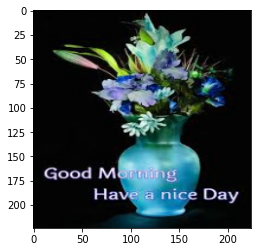

In [91]:
i=1
plt.imshow(Xtrain[i])
print(ytrain[i])

[0]


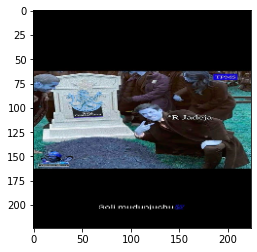

In [92]:
i=2
plt.imshow(Xtrain[i])
print(ytrain[i])

In [93]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [94]:
model.fit(Xtrain,ytrain,epochs=15)

Epoch 1/15
6/6 [==============================] - 1s 129ms/step - loss: 1.4835 - accuracy: 0.4915
Epoch 2/15
6/6 [==============================] - 1s 130ms/step - loss: 0.6592 - accuracy: 0.5876
Epoch 3/15
6/6 [==============================] - 1s 129ms/step - loss: 0.6189 - accuracy: 0.6497
Epoch 4/15
6/6 [==============================] - 1s 128ms/step - loss: 0.4754 - accuracy: 0.7853
Epoch 5/15
6/6 [==============================] - 1s 129ms/step - loss: 0.6312 - accuracy: 0.6780
Epoch 6/15
6/6 [==============================] - 1s 130ms/step - loss: 0.4781 - accuracy: 0.7684
Epoch 7/15
6/6 [==============================] - 1s 129ms/step - loss: 0.3735 - accuracy: 0.8249
Epoch 8/15
6/6 [==============================] - 1s 130ms/step - loss: 0.3287 - accuracy: 0.8644
Epoch 9/15
6/6 [==============================] - 1s 131ms/step - loss: 0.4495 - accuracy: 0.7966
Epoch 10/15
6/6 [==============================] - 1s 129ms/step - loss: 0.2509 - accuracy: 0.9153
Epoch 11/15
6/6 [==

In [95]:
yp=model.predict(Xtest)

In [96]:
YP=yp>0.5

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(ytest,YP)

0.7532467532467533

In [99]:
from sklearn.metrics import confusion_matrix

In [101]:
confusion_matrix(ytest,YP)

array([[31,  4],
       [15, 27]])

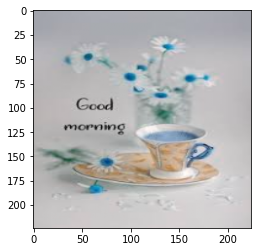

yes it is good morning wish
____________________________________________________________________________________________________


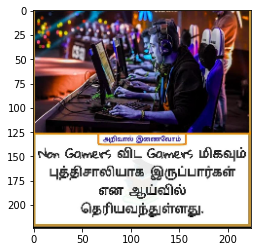

not a good morning wish
____________________________________________________________________________________________________


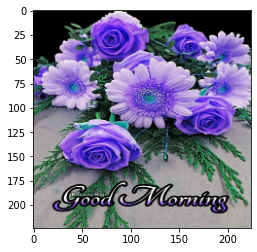

not a good morning wish
____________________________________________________________________________________________________


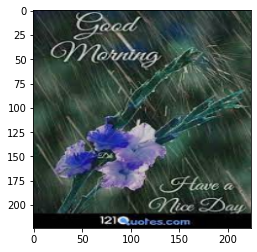

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


yes it is good morning wish
____________________________________________________________________________________________________


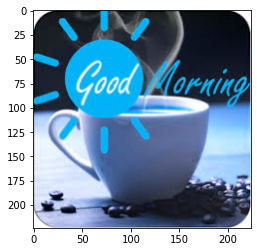

yes it is good morning wish
____________________________________________________________________________________________________


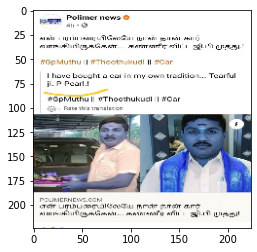

not a good morning wish
____________________________________________________________________________________________________


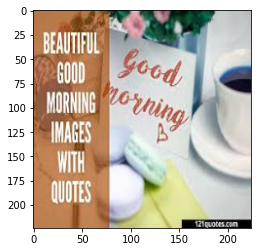

not a good morning wish
____________________________________________________________________________________________________


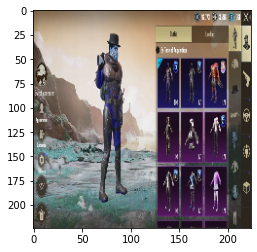

not a good morning wish
____________________________________________________________________________________________________


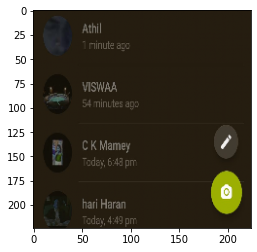

not a good morning wish
____________________________________________________________________________________________________


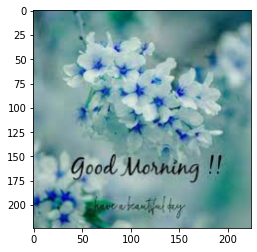

yes it is good morning wish
____________________________________________________________________________________________________


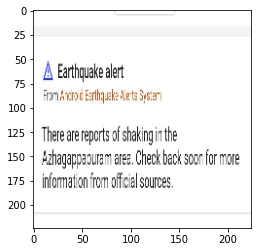

not a good morning wish
____________________________________________________________________________________________________


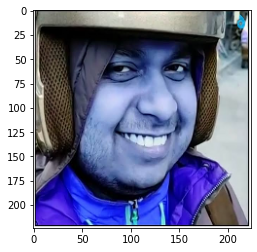

not a good morning wish
____________________________________________________________________________________________________


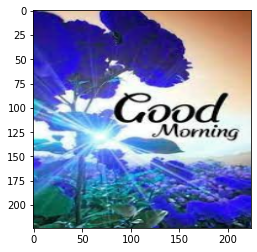

not a good morning wish
____________________________________________________________________________________________________


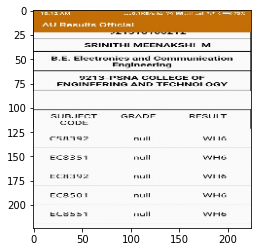

not a good morning wish
____________________________________________________________________________________________________


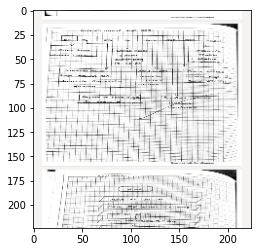

not a good morning wish
____________________________________________________________________________________________________


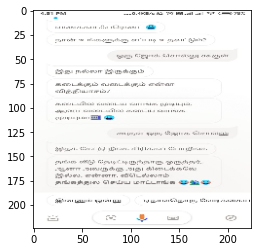

not a good morning wish
____________________________________________________________________________________________________


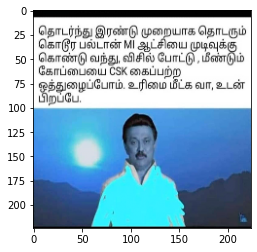

yes it is good morning wish
____________________________________________________________________________________________________


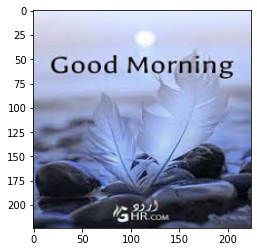

yes it is good morning wish
____________________________________________________________________________________________________


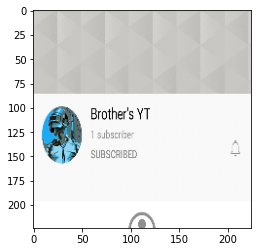

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


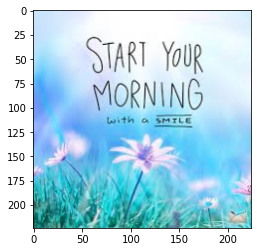

yes it is good morning wish
____________________________________________________________________________________________________


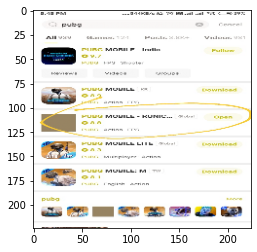

not a good morning wish
____________________________________________________________________________________________________


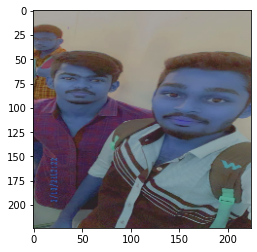

yes it is good morning wish
____________________________________________________________________________________________________


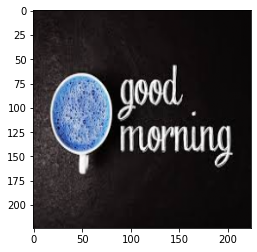

yes it is good morning wish
____________________________________________________________________________________________________


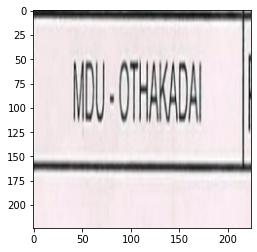

not a good morning wish
____________________________________________________________________________________________________


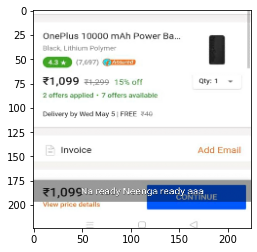

not a good morning wish
____________________________________________________________________________________________________


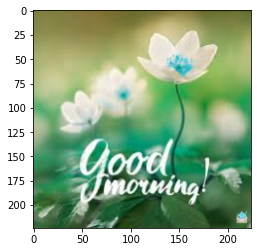

yes it is good morning wish
____________________________________________________________________________________________________


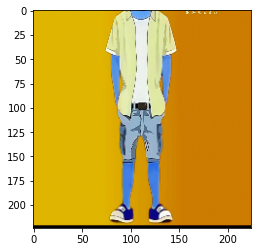

not a good morning wish
____________________________________________________________________________________________________


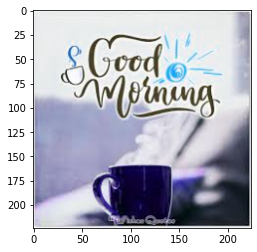

not a good morning wish
____________________________________________________________________________________________________


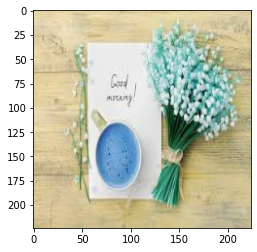

yes it is good morning wish
____________________________________________________________________________________________________


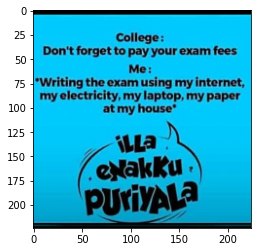

yes it is good morning wish
____________________________________________________________________________________________________


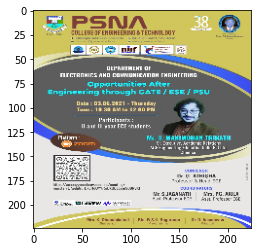

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


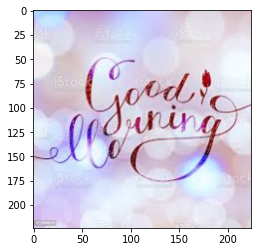

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


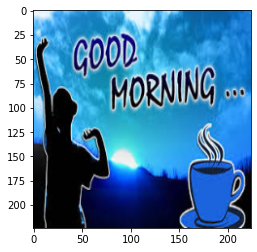

yes it is good morning wish
____________________________________________________________________________________________________


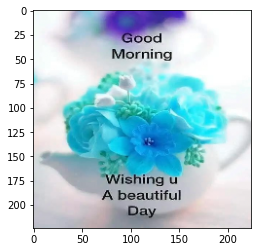

yes it is good morning wish
____________________________________________________________________________________________________


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


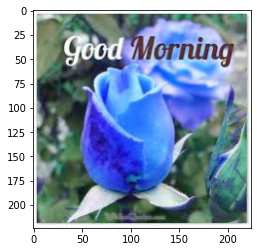

yes it is good morning wish
____________________________________________________________________________________________________


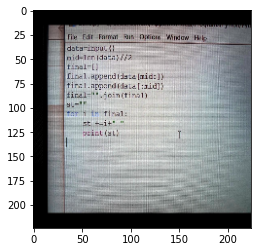

not a good morning wish
____________________________________________________________________________________________________


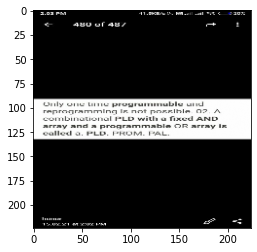

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


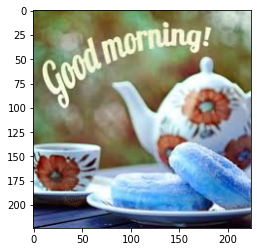

not a good morning wish
____________________________________________________________________________________________________


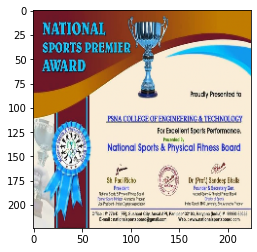

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


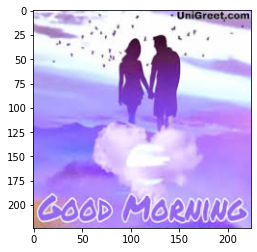

not a good morning wish
____________________________________________________________________________________________________


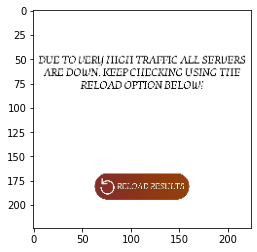

not a good morning wish
____________________________________________________________________________________________________


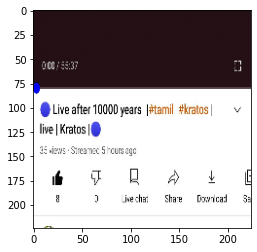

not a good morning wish
____________________________________________________________________________________________________


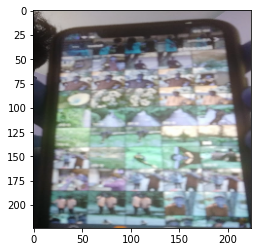

not a good morning wish
____________________________________________________________________________________________________


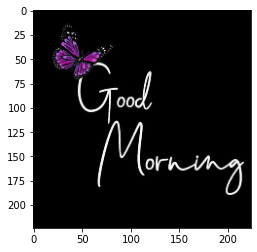

not a good morning wish
____________________________________________________________________________________________________


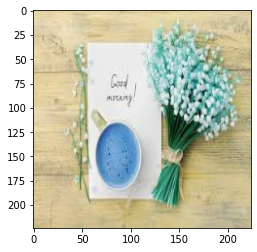

yes it is good morning wish
____________________________________________________________________________________________________


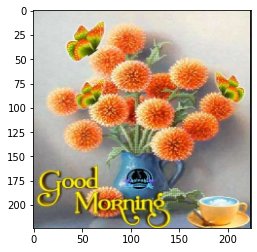

not a good morning wish
____________________________________________________________________________________________________


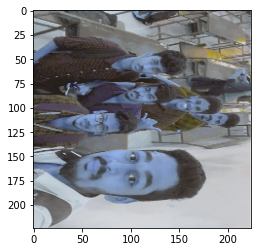

not a good morning wish
____________________________________________________________________________________________________


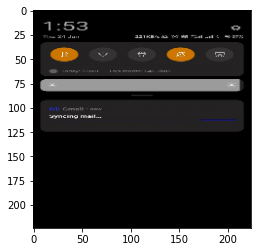

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


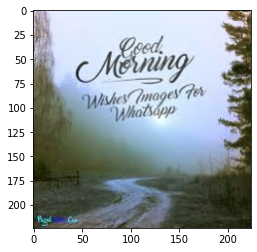

not a good morning wish
____________________________________________________________________________________________________


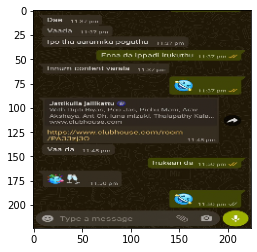

not a good morning wish
____________________________________________________________________________________________________


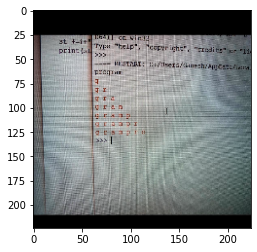

not a good morning wish
____________________________________________________________________________________________________


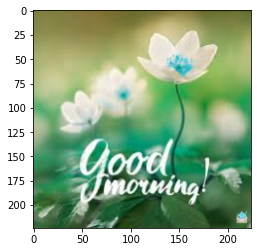

yes it is good morning wish
____________________________________________________________________________________________________


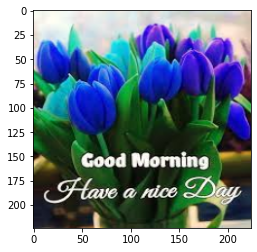

yes it is good morning wish
____________________________________________________________________________________________________


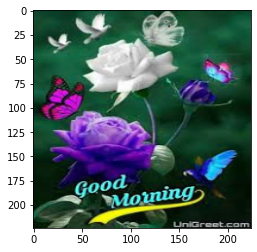

yes it is good morning wish
____________________________________________________________________________________________________


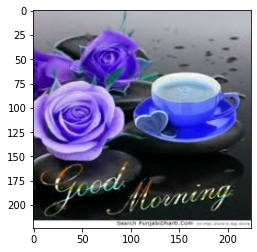

yes it is good morning wish
____________________________________________________________________________________________________


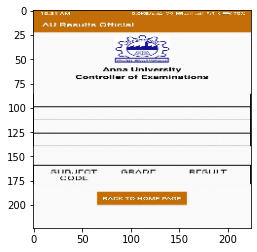

not a good morning wish
____________________________________________________________________________________________________


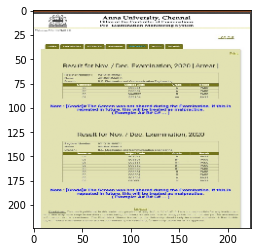

not a good morning wish
____________________________________________________________________________________________________


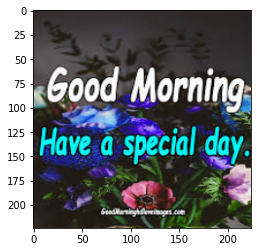

yes it is good morning wish
____________________________________________________________________________________________________


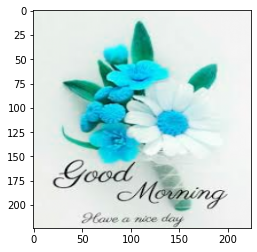

yes it is good morning wish
____________________________________________________________________________________________________


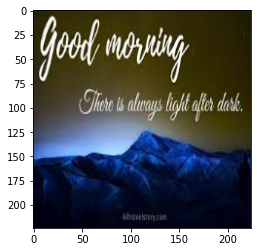

not a good morning wish
____________________________________________________________________________________________________


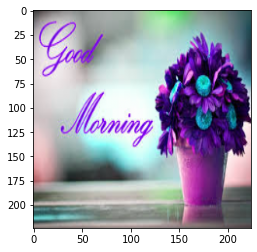

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


yes it is good morning wish
____________________________________________________________________________________________________


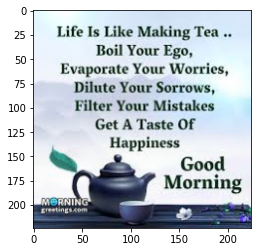

yes it is good morning wish
____________________________________________________________________________________________________


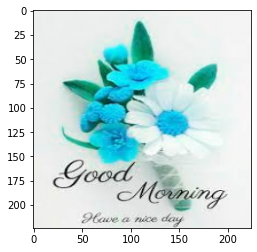

yes it is good morning wish
____________________________________________________________________________________________________


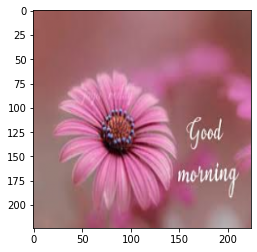

not a good morning wish
____________________________________________________________________________________________________


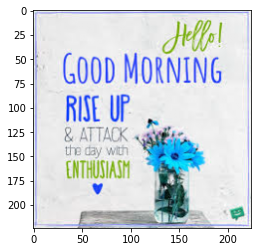

yes it is good morning wish
____________________________________________________________________________________________________


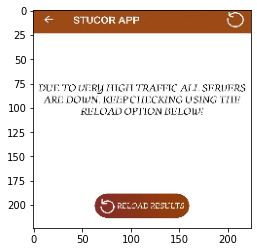

not a good morning wish
____________________________________________________________________________________________________


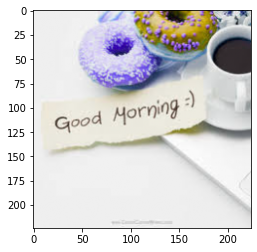

not a good morning wish
____________________________________________________________________________________________________


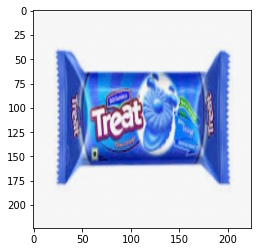

yes it is good morning wish
____________________________________________________________________________________________________


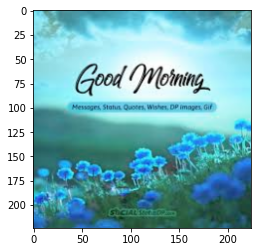

yes it is good morning wish
____________________________________________________________________________________________________


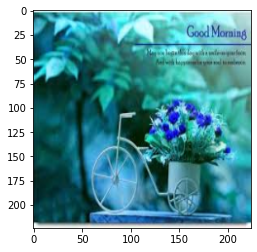

yes it is good morning wish
____________________________________________________________________________________________________


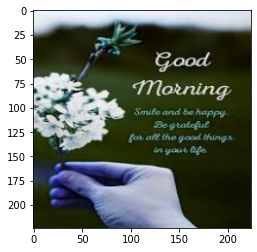

not a good morning wish
____________________________________________________________________________________________________


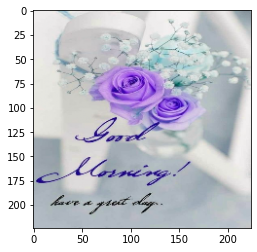

yes it is good morning wish
____________________________________________________________________________________________________


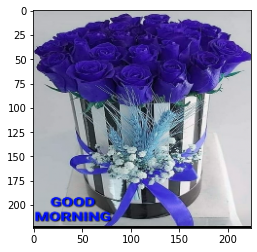

not a good morning wish
____________________________________________________________________________________________________


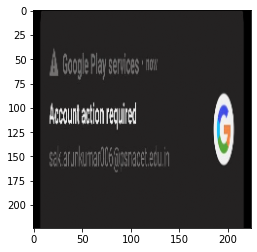

not a good morning wish
____________________________________________________________________________________________________


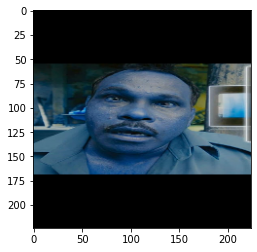

not a good morning wish
____________________________________________________________________________________________________


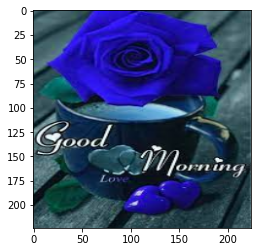

yes it is good morning wish
____________________________________________________________________________________________________


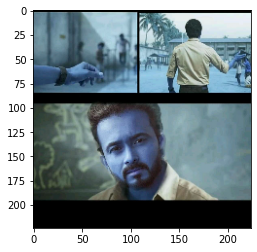

not a good morning wish
____________________________________________________________________________________________________


In [107]:
for i in range(len(Xtest)):
  plt.imshow(Xtest[i])
  plt.show()
  print(["yes it is good morning wish" if YP[i]==1 else "not a good morning wish"][0])
  print("_"*100)
